# PROJECT DESCRIPTION

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df=pd.read_csv("Abalone_case_study.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


From the dataset we infer that there are 4177 rows and 9 columns including the target column "Rings"

As we see that the column "sex" is string value so we will use Label Encoder to transform the Column "Sex"

In [4]:
LE=LabelEncoder()

df["Sex"]=LE.fit_transform(df["Sex"])

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df["Sex"].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

here "0" is female.
"1" is infant
"2" is male

In [7]:
#checking data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [8]:
#checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

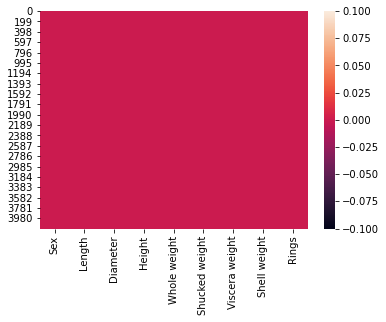

In [9]:
#Checking null values using heatmap
sns.heatmap(df.isnull())

From the above description we found that the dataset does not contain any null values also there are no strings available in the columns

# DATA VISUALIZATION USING GRAPH PLOTS

In [10]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

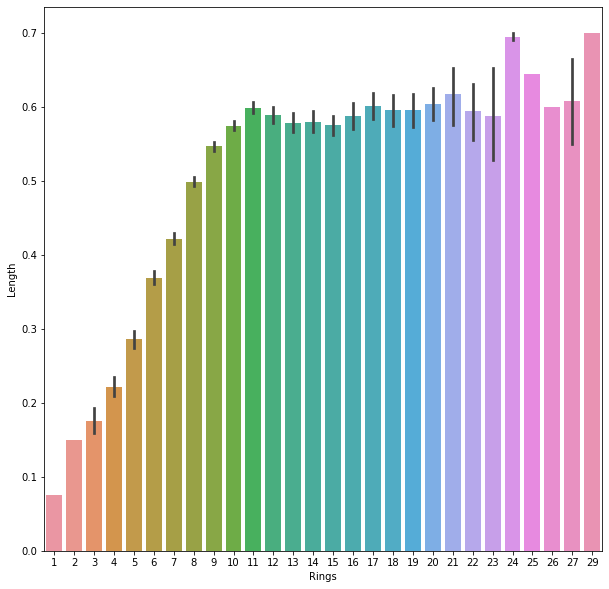

In [11]:
#Length v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Length",data=df)

From the graph we can infer that there is an increasing trend.

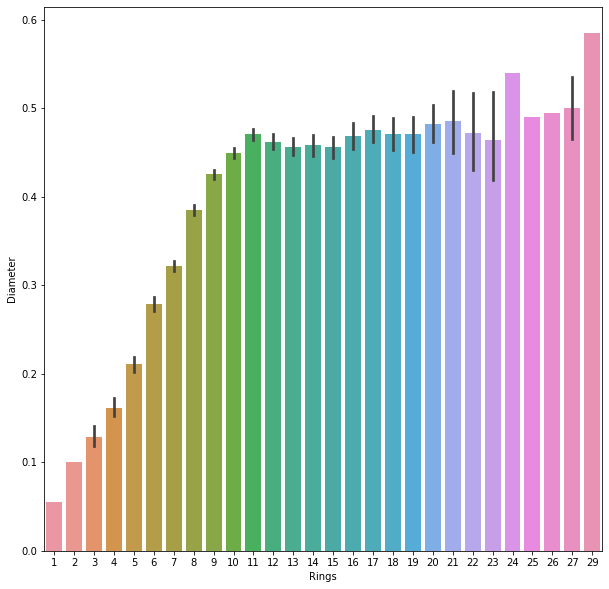

In [12]:
#Diameter v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Diameter",data=df)

From the graph we can infer that there is an increasing trend.

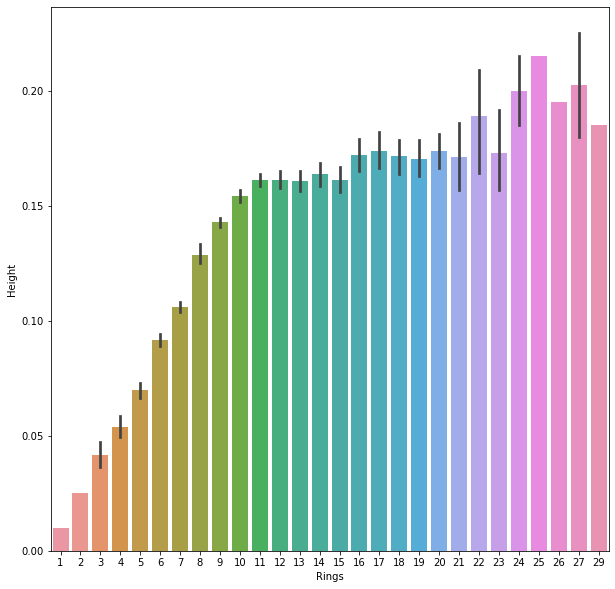

In [13]:
#Height v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Height",data=df)

From the graph we can infer that there is an increasing trend.

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

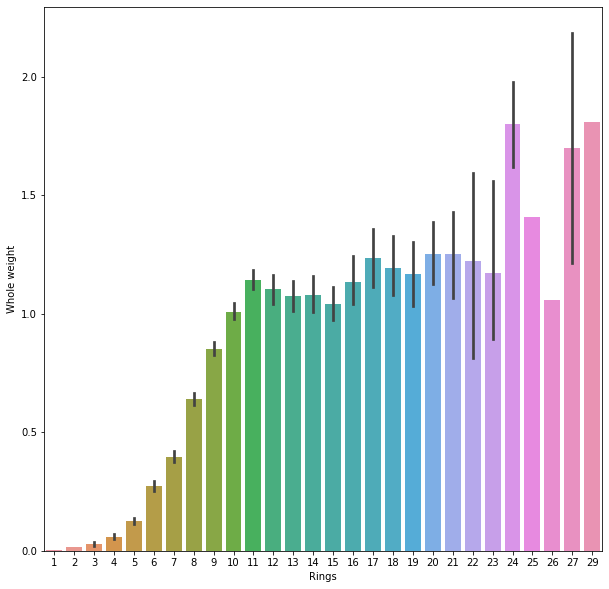

In [15]:
#Whole weight v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Whole weight",data=df)

From the graph we can infer that there is an increasing trend

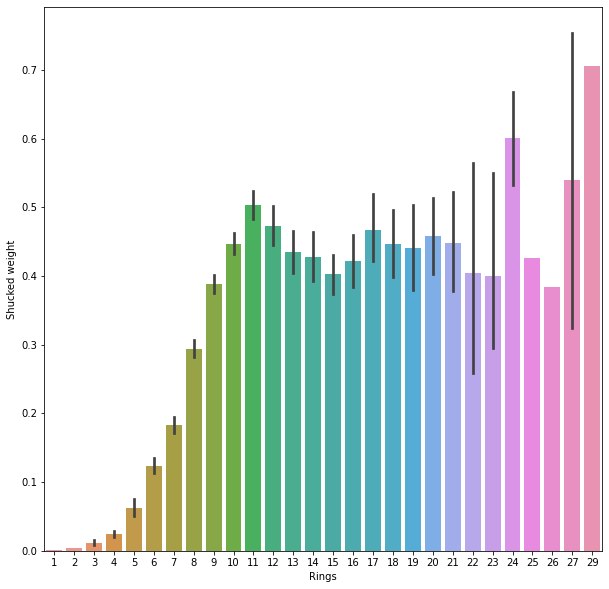

In [16]:
#Shucked weight v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Shucked weight",data=df)

From the graph we can infer that there is both increasing and decreasing trend

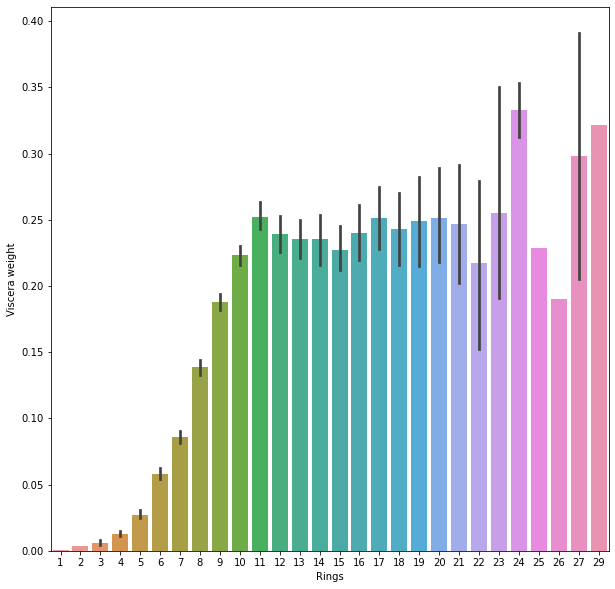

In [17]:
#Viscera weight v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Viscera weight",data=df)

From the graph we can infer that there is both increasing and decreasing trend

In [18]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

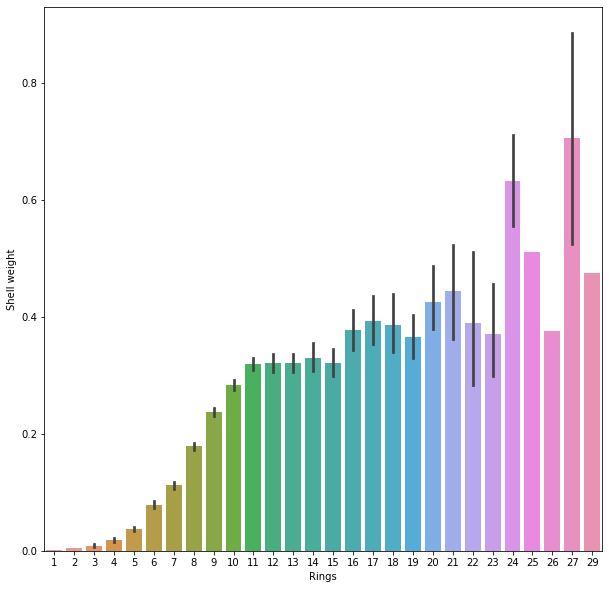

In [19]:
#Shell weight v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Shell weight",data=df)

From the graph it is clear that there are both increasing and very little decreasing trends

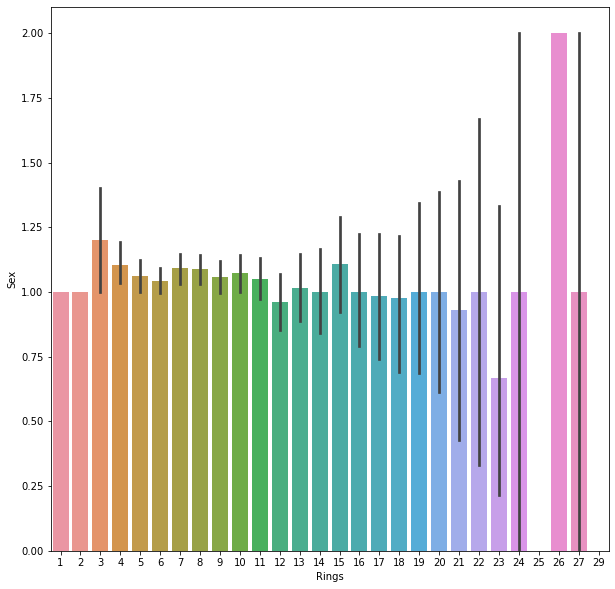

In [20]:
#Sex v/s no. of rings
plt.figure(figsize=(10,10))
sns.barplot(x='Rings',y="Sex",data=df)

Plotting the sex vs ring graph shows an erroneous trend so we can infer that this column has little impact on the age

# MULTIVARIATE ANALYSIS

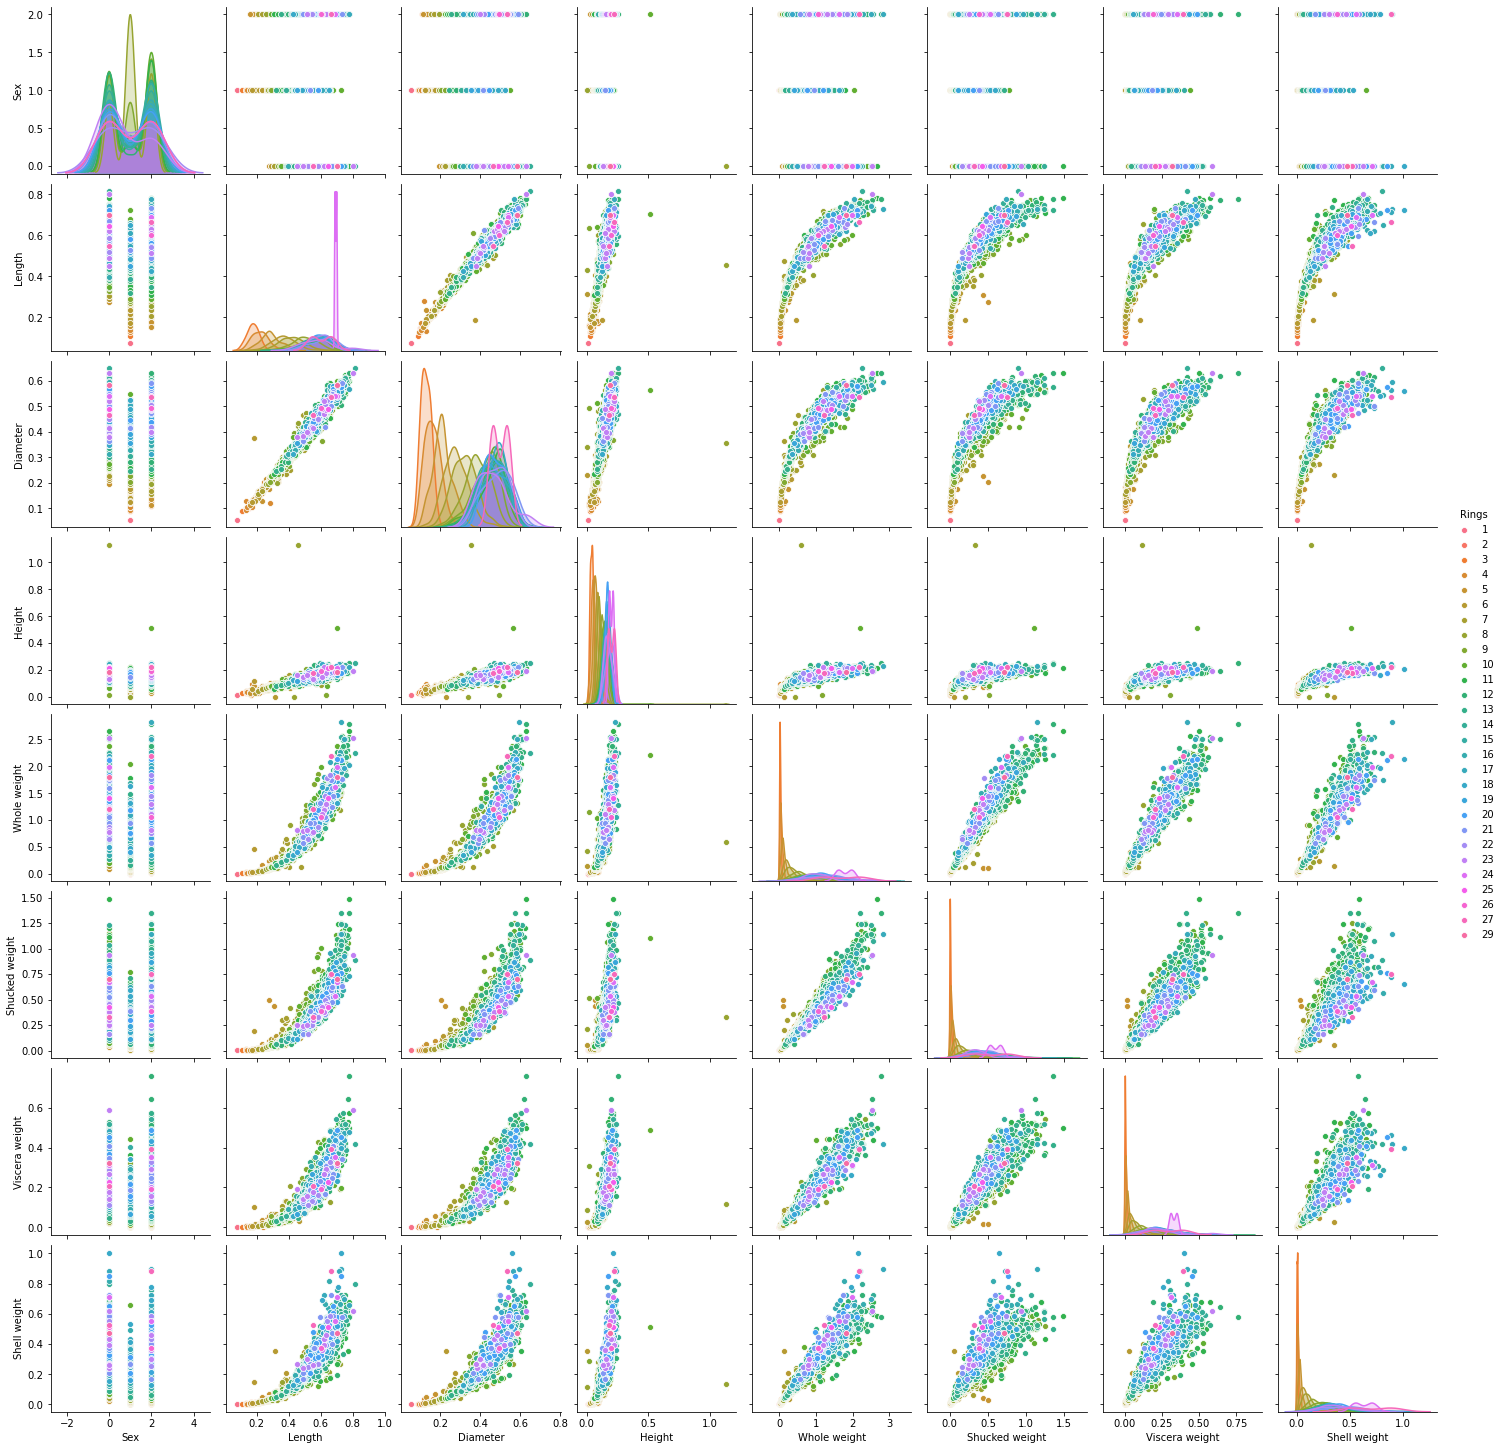

In [23]:
sns.pairplot(df,hue="Rings")

From these multivariate analysis we found that there is skewness in data also we found that each column represents an increasing trend with the target column

CHECKING COLLINEARITY

In [28]:
corr_mat=df.corr() #multivariate analysis
corr_mat

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


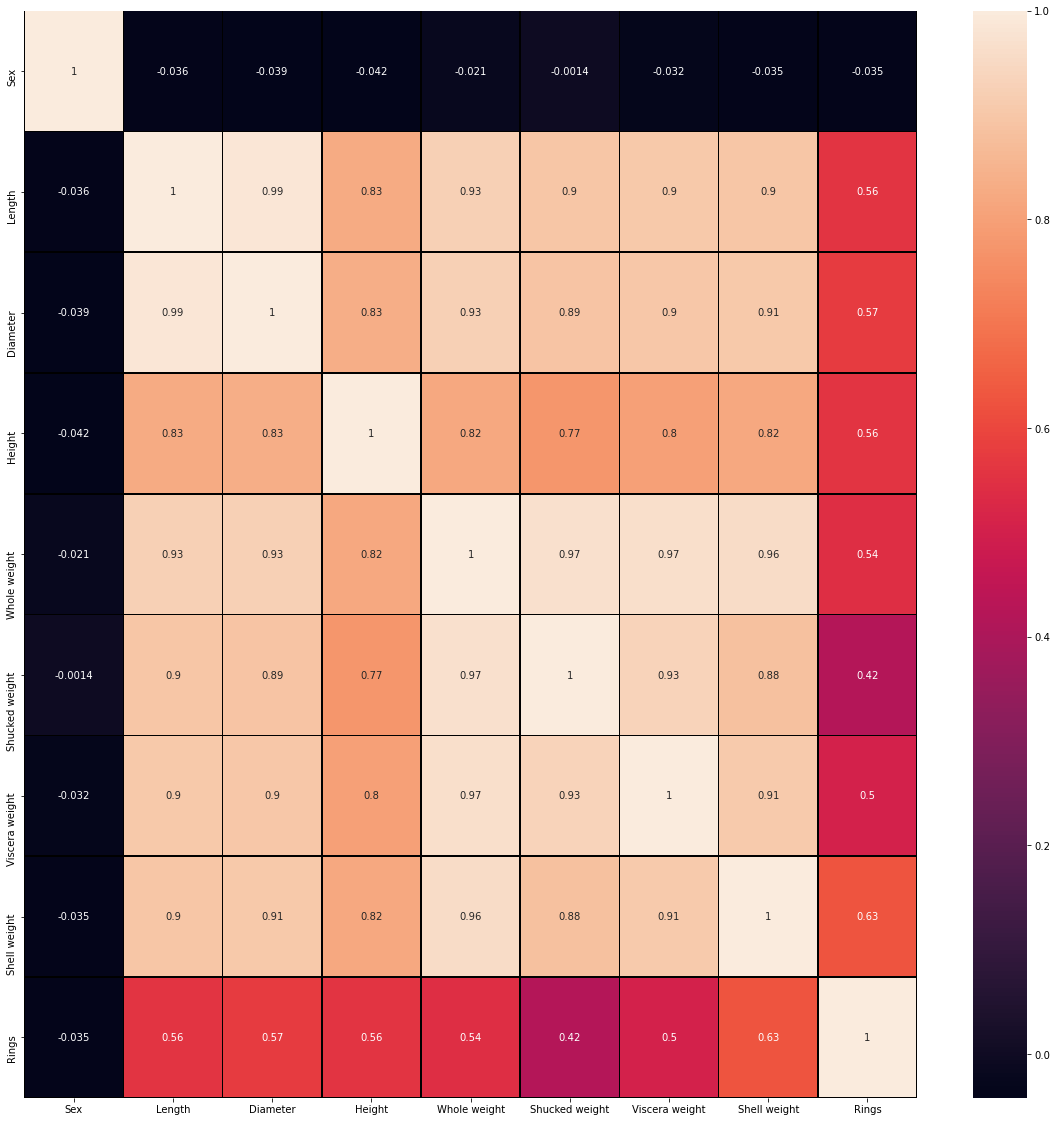

In [29]:
#checking correlation using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")

From the heatmap we can infer that only the column sex is having less collinearity value. It is also evident from the fact that the strings has been converted to integer. So we have to keep this column. Also other columns shows strong collinearity with the target column

In [30]:
#statistical summary
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From statistical summary it is evident that there is outliers and skewness present in the data

# CHECKING FOR CLASS IMBALANCE

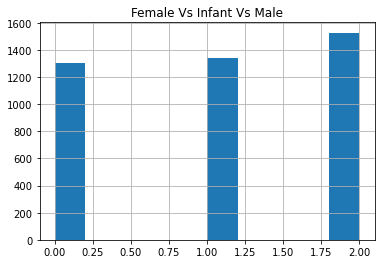

In [31]:
df['Sex'].hist(grid=True)
plt.title("Female Vs Infant Vs Male")
plt.show()

From the graph it is evident that there is no class imbalance

# OUTLIERS REMOVAL

In [32]:
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [33]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [34]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


In [35]:
loss_percentage=(4177-4027)/4177*100
print(loss_percentage)

3.5910940866650707


# Let us go for boxplot analysis

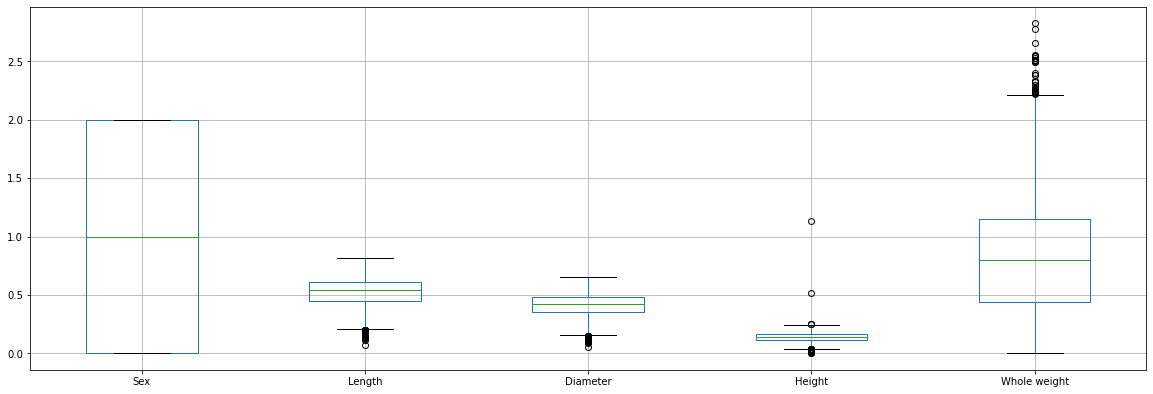

In [36]:
df.iloc[:,0:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

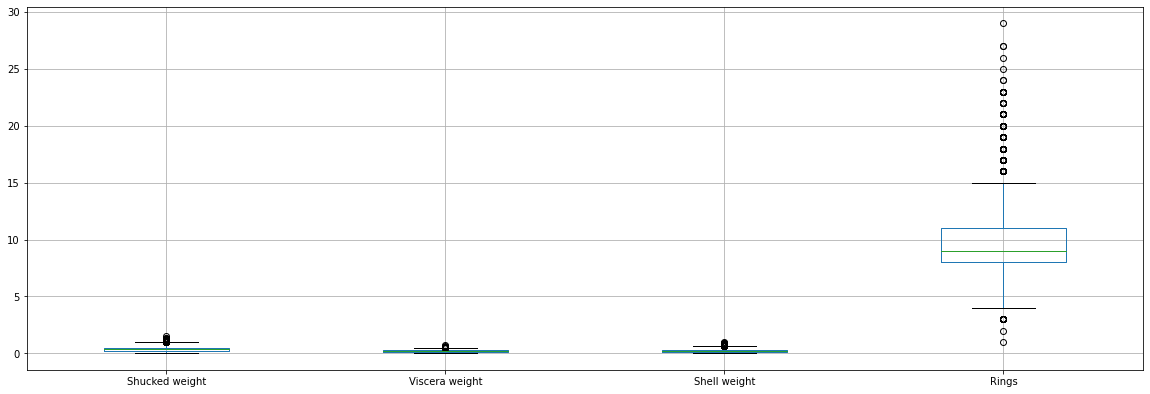

In [37]:
df.iloc[:,5:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As from the boxplot analysis it is evident that there are outliers in the columns which are away from the whiskers so we will take the dataset after removal of outliers

# SPLITTING DATASET

In [38]:
x=df_new.drop("Rings",axis=1)

In [39]:
x.shape

(4027, 8)

In [40]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [41]:
y=df_new["Rings"]

In [42]:
y.shape

(4027,)

In [43]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [44]:
#checking skewness
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

As the skewness is not within the acceptable range so we will remove the skewness using Power Transform

In [52]:
from sklearn.preprocessing import power_transform

In [45]:
x=power_transform(x,method="yeo-johnson")

NameError: name 'power_transform' is not defined

In [47]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

Now we see the skewness within the acceptable range

# SCALING THE DATA

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.15969763, -0.56936804, -0.42027443, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [ 1.15969763, -1.47535808, -1.4631268 , ..., -1.20941043,
        -1.23110406, -1.25603283],
       [-1.28538214,  0.07776771,  0.15329438, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 1.15969763,  0.68176107,  0.72686319, ...,  0.85473721,
         1.08172072,  0.60445329],
       [-1.28538214,  0.89747298,  0.83114842, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.15969763,  1.63089349,  1.56114509, ...,  2.88981235,
         1.94298183,  2.06626381]])

In [49]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# TRAINING THE MODEL

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [63]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Finding Best Random State

In [65]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.5615736108242693 on Random_state:  646


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=646)

In [69]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("r2 score: ",r2_score(y_test,pred))
    print("Error:")
    print("Mean_Absolute_Error: ",mean_absolute_error(y_test,pred))
    print("Mean_Squared_Error: ",mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,pred)))

In [70]:
eval(LinearRegression())

r2 score:  0.5615736108242693
Error:
Mean_Absolute_Error:  1.4353136343397837
Mean_Squared_Error:  3.611328846642775
Root_Mean_Squared_Error:  1.9003496643099067


In [71]:
eval(DecisionTreeRegressor())

r2 score:  0.15098187676278418
Error:
Mean_Absolute_Error:  1.8800661703887511
Mean_Squared_Error:  6.9933829611248965
Root_Mean_Squared_Error:  2.64450051259683


In [72]:
eval(RandomForestRegressor())

r2 score:  0.57960398182643
Error:
Mean_Absolute_Error:  1.3748221670802316
Mean_Squared_Error:  3.46281224152192
Root_Mean_Squared_Error:  1.8608633054370005


In [73]:
eval(SVR())

r2 score:  0.5838729016728305
Error:
Mean_Absolute_Error:  1.3297445238962564
Mean_Squared_Error:  3.4276490447665973
Root_Mean_Squared_Error:  1.8513911106966559


# Cross Validation

In [74]:
scr=cross_val_score(LinearRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.4148020401486132


In [76]:
scr=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print("scr for DTR",scr.mean())

scr for DTR -0.08998608501401402


In [78]:
scr=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print("scr for RFR",scr.mean())

scr for RFR 0.45517420341466475


In [79]:
scr=cross_val_score(SVR(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM 0.4912682204475683


In [81]:
#calculating differencec between accuracy score and cv score
LR1=(.5615-.4148)*100
DTR1=(.1509+.0899)*100
RFR1=(.5796-.4551)*100
SVR1=(.5838-.4912)*100

In [82]:
LR1

14.67

In [83]:
DTR1

24.080000000000002

In [84]:
RFR1

12.45

In [85]:
SVR1

9.259999999999996

From the above calculation we found Support Vector Regressor is the best model

# HYPERPARAMETER TUNING

In [86]:
from sklearn.model_selection import GridSearchCV

In [89]:
#parameters for SVR()
parameters={'C': [0.1,1,10,100,1000],
           'kernel':['poly','rbf','sigmoid']}

In [90]:
GCV_SVR=GridSearchCV(SVR(),parameters,cv=5)
GCV_SVR.fit(x_train,y_train)
GCV_SVR.best_params_

{'C': 10, 'kernel': 'rbf'}

In [92]:
SVR_mod=SVR(kernel='rbf',C=10)
SVR_mod.fit(x_train,y_train)
pred=SVR_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

59.52088187648008


Hyper Parameter Tuning resulted in increase of r2 score

# Model Saving

In [93]:
import joblib
joblib.dump(SVR_mod,"Abalone_Case_Study_Final_Result.pkl")

['Abalone_Case_Study_Final_Result.pkl']